In [1]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('tesla.csv')

In [3]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2015-06-01 00:00:00+00:00,249.45,251.60,247.47,251.41,2505057,249.45,251.60,247.47,251.41,2505057,0.0,1.0
1,TSLA,2015-06-02 00:00:00+00:00,248.35,249.40,246.30,248.92,2134809,248.35,249.40,246.30,248.92,2134809,0.0,1.0
2,TSLA,2015-06-03 00:00:00+00:00,248.99,250.72,247.01,248.20,1781505,248.99,250.72,247.01,248.20,1781505,0.0,1.0
3,TSLA,2015-06-04 00:00:00+00:00,245.92,249.30,245.71,247.50,2453615,245.92,249.30,245.71,247.50,2453615,0.0,1.0
4,TSLA,2015-06-05 00:00:00+00:00,249.14,249.70,245.68,246.00,3022026,249.14,249.70,245.68,246.00,3022026,0.0,1.0


In [4]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2020-05-21 00:00:00+00:00,827.60,832.50,796.000,816.0000,12182524,827.60,832.50,796.000,816.0000,12182524,0.0,1.0
1254,TSLA,2020-05-22 00:00:00+00:00,816.88,831.78,812.000,822.1735,9987475,816.88,831.78,812.000,822.1735,9987475,0.0,1.0
1255,TSLA,2020-05-26 00:00:00+00:00,818.87,834.60,815.705,834.5000,8089736,818.87,834.60,815.705,834.5000,8089736,0.0,1.0
1256,TSLA,2020-05-27 00:00:00+00:00,820.23,827.71,785.000,820.8600,11549530,820.23,827.71,785.000,820.8600,11549530,0.0,1.0
1257,TSLA,2020-05-28 00:00:00+00:00,805.81,824.75,801.690,813.5100,7275774,805.81,824.75,801.690,813.5100,7275774,0.0,1.0


In [5]:
df=data.reset_index()['close']
df

0       249.45
1       248.35
2       248.99
3       245.92
4       249.14
         ...  
1253    827.60
1254    816.88
1255    818.87
1256    820.23
1257    805.81
Name: close, Length: 1258, dtype: float64

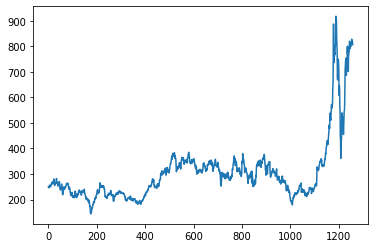

In [6]:
df.plot()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
##splitting dataset into train and test split
training_size=int(len(df)*0.75)
training_size

943

In [9]:
test_size=len(df)-training_size
test_size

315

In [10]:
train_data,test_data=df[0:training_size],df[training_size:len(df)]

In [11]:
def create_data(dataset,time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]  
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_data(train_data, time_step)
X_test, ytest = create_data(test_data, time_step)

In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
import tensorflow as tf
physical_devices=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='Adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 842 samples, validate on 214 samples
Epoch 1/100
842/842 [==============================] - 6s 8ms/sample - loss: 0.0089 - val_loss: 0.0827
Epoch 2/100
842/842 [==============================] - 0s 502us/sample - loss: 0.0026 - val_loss: 0.0432
Epoch 3/100
842/842 [==============================] - 0s 512us/sample - loss: 0.0014 - val_loss: 0.0203
Epoch 4/100
842/842 [==============================] - 0s 520us/sample - loss: 9.3220e-04 - val_loss: 0.0160
Epoch 5/100
842/842 [==============================] - 0s 503us/sample - loss: 8.5466e-04 - val_loss: 0.0171
Epoch 6/100
842/842 [==============================] - 0s 539us/sample - loss: 7.7063e-04 - val_loss: 0.0187
Epoch 7/100
842/842 [==============================] - 0s 516us/sample - loss: 7.5049e-04 - val_loss: 0.0152
Epoch 8/100
842/842 [==============================] - 0s 528us/sample - loss: 8.1231e-04 - val_loss: 0.0153
Epoch 9/100
842/842 [==============================] - 0s 507us/sample - loss: 7.2837e-04 - val_

842/842 [==============================] - 0s 529us/sample - loss: 1.8735e-04 - val_loss: 0.0048
Epoch 76/100
842/842 [==============================] - 0s 525us/sample - loss: 1.9108e-04 - val_loss: 0.0083
Epoch 77/100
842/842 [==============================] - 0s 508us/sample - loss: 2.1290e-04 - val_loss: 0.0057
Epoch 78/100
842/842 [==============================] - 0s 533us/sample - loss: 1.8575e-04 - val_loss: 0.0045
Epoch 79/100
842/842 [==============================] - 0s 507us/sample - loss: 2.0777e-04 - val_loss: 0.0054
Epoch 80/100
842/842 [==============================] - 0s 508us/sample - loss: 1.9957e-04 - val_loss: 0.0055
Epoch 81/100
842/842 [==============================] - 0s 534us/sample - loss: 1.7598e-04 - val_loss: 0.0073
Epoch 82/100
842/842 [==============================] - 0s 566us/sample - loss: 1.9095e-04 - val_loss: 0.0046
Epoch 83/100
842/842 [==============================] - 0s 572us/sample - loss: 1.9449e-04 - val_loss: 0.0027
Epoch 84/100
842/842 [=

In [18]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [19]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

*FORECASTING*

In [20]:
x_input=test_data[215:].reshape(1,-1)
x_input.shape

(1, 100)

In [21]:
def forecast(input_data,days):
    temp_input=list(input_data)
    temp_input=temp_input[0].tolist()
    output=list()
    i=0
    n_steps=100
    while (i<days):
        if (len(temp_input)>n_steps):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1,n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = input_data.reshape((1,n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            output.extend(yhat.tolist())
            i=i+1
    return scaler.inverse_transform(output).tolist()

In [23]:
# prediction for next 30 days
forecast(x_input,30)

[[708.6556954067945],
 [614.4125261288881],
 [534.9612260740995],
 [488.0950489771366],
 [469.32649170428516],
 [467.66269927293064],
 [473.71529997706415],
 [481.516506126225],
 [487.61822366535665],
 [490.2123996374011],
 [488.7085943427682],
 [483.4636312109232],
 [475.4595702272654],
 [465.9305122253299],
 [456.0331010204554],
 [446.6372119021416],
 [438.2553663608432],
 [431.07840520709755],
 [425.0638758149743],
 [420.0346808639169],
 [415.7598098126054],
 [412.01046583622696],
 [408.5923030731082],
 [405.359193174243],
 [402.2150239479542],
 [399.1073349249363],
 [396.01758622944357],
 [392.94995163947345],
 [389.9210109692812],
 [386.9518175852299]]